## EJERCICIO CON DATOS SIMULADOS 1

In [154]:
# IMPORTAR LIBRERÍAS

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CREACIÓN DE LOS DATOS SIMULADOS DE VENTAS

data = {
    'Fecha': pd.date_range(start='2023-01-01', periods=100, freq='D').tolist(),
    'Producto': np.random.choice(['Producto A', 'Producto B', 'Producto C', 'Producto D'], 100),
    'Categoría': np.random.choice(['Electrónica', 'Ropa', 'Juguetes', 'Hogar'], 100),
    'Precio': np.round(np.random.uniform(10, 200, size=100), 2),
    'Cantidad': np.random.randint(1, 10, size=100),
    'Método de Pago': np.random.choice(['Tarjeta', 'Transferencia', 'Efectivo'], 100),
    'Cliente VIP': np.random.choice([True, False], 100)
}

# Crear el DataFrame
df_ventas = pd.DataFrame(data)
df_ventas

,Fecha,Producto,Categoría,Precio,Cantidad,Método de Pago,Cliente VIP
0,2023-01-01,Producto C,Juguetes,190.38,1,Tarjeta,False
1,2023-01-02,Producto C,Juguetes,34.99,3,Transferencia,True
2,2023-01-03,Producto A,Hogar,164.24,9,Tarjeta,True
3,2023-01-04,Producto A,Hogar,23.79,3,Efectivo,False
4,2023-01-05,Producto A,Ropa,53.25,9,Efectivo,True
...,...,...,...,...,...,...,...
95,2023-04-06,Producto A,Hogar,97.89,6,Transferencia,True
96,2023-04-07,Producto A,Ropa,59.75,5,Tarjeta,True
97,2023-04-08,Producto D,Ropa,178.45,6,Transferencia,False
98,2023-04-09,Producto B,Electrónica,105.14,7,Efectivo,False


In [5]:
# CREAR COLUMNA DE VENTAS TOTALES

df_ventas["Total_Venta"] = df_ventas["Precio"] * df_ventas["Cantidad"]
df_ventas

,Fecha,Producto,Categoría,Precio,Cantidad,Método de Pago,Cliente VIP,Total_Venta
0,2023-01-01,Producto C,Juguetes,190.38,1,Tarjeta,False,190.38
1,2023-01-02,Producto C,Juguetes,34.99,3,Transferencia,True,104.97
2,2023-01-03,Producto A,Hogar,164.24,9,Tarjeta,True,1478.16
3,2023-01-04,Producto A,Hogar,23.79,3,Efectivo,False,71.37
4,2023-01-05,Producto A,Ropa,53.25,9,Efectivo,True,479.25
...,...,...,...,...,...,...,...,...
95,2023-04-06,Producto A,Hogar,97.89,6,Transferencia,True,587.34
96,2023-04-07,Producto A,Ropa,59.75,5,Tarjeta,True,298.75
97,2023-04-08,Producto D,Ropa,178.45,6,Transferencia,False,1070.70
98,2023-04-09,Producto B,Electrónica,105.14,7,Efectivo,False,735.98


In [9]:
# EXTRAER AÑO Y MES DE LA TRANSACCIÓN

df_ventas["Mes"] = df_ventas["Fecha"].dt.month
df_ventas["Año"] = df_ventas["Fecha"].dt.year
df_ventas

,Fecha,Producto,Categoría,Precio,Cantidad,Método de Pago,Cliente VIP,Total_Venta,Mes,Año
0,2023-01-01,Producto C,Juguetes,190.38,1,Tarjeta,False,190.38,1,2023
1,2023-01-02,Producto C,Juguetes,34.99,3,Transferencia,True,104.97,1,2023
2,2023-01-03,Producto A,Hogar,164.24,9,Tarjeta,True,1478.16,1,2023
3,2023-01-04,Producto A,Hogar,23.79,3,Efectivo,False,71.37,1,2023
4,2023-01-05,Producto A,Ropa,53.25,9,Efectivo,True,479.25,1,2023
...,...,...,...,...,...,...,...,...,...,...
95,2023-04-06,Producto A,Hogar,97.89,6,Transferencia,True,587.34,4,2023
96,2023-04-07,Producto A,Ropa,59.75,5,Tarjeta,True,298.75,4,2023
97,2023-04-08,Producto D,Ropa,178.45,6,Transferencia,False,1070.70,4,2023
98,2023-04-09,Producto B,Electrónica,105.14,7,Efectivo,False,735.98,4,2023


In [53]:
# Categorías más vendidas en términos de cantidad de productos

Categorias_mas_vendidas = df_ventas.groupby("Categoría")["Cantidad"].sum().sort_values(ascending = False)
Categorias_mas_vendidas

Categoría
Electrónica    133
Juguetes       132
Ropa           127
Hogar           98
Name: Cantidad, dtype: int32

In [55]:
# 3 categorías con mayor total de ventas

Categorias_mayor_ventas = df_ventas.groupby("Categoría")["Total_Venta"].sum().sort_values(ascending = False).head(3)
Categorias_mayor_ventas

Categoría
Juguetes       16860.79
Electrónica    13844.05
Ropa           13488.52
Name: Total_Venta, dtype: float64

In [57]:
# total de ventas realizado por clientes VIP

total_ventas_vip = df_ventas.groupby("Cliente VIP")["Total_Venta"].sum().sort_values(ascending = False)
total_ventas_vip

Cliente VIP
True     31716.62
False    21783.51
Name: Total_Venta, dtype: float64

In [59]:
# ¿Qué porcentaje de ventas totales proviene de clientes VIP?

ventas_totales_vip = df_ventas[df_ventas["Cliente VIP"] == True]["Total_Venta"].sum()
porcentaje_ventas_vip = ((ventas_totales_vip / df_ventas["Total_Venta"].sum()) * 100).round(2)
porcentaje_ventas_vip

59.28

In [61]:
# número de ventas por método de pago

ventas_metodo_de_pago = df_ventas.groupby("Método de Pago")["Cantidad"].sum().sort_values(ascending = False)
por_ventas_metodo_de_pago = (ventas_metodo_de_pago / sum(df_ventas["Cantidad"]) * 100).round(2)
ventas_metodo_de_pago, por_ventas_metodo_de_pago

(Método de Pago
 Transferencia    204
 Efectivo         144
 Tarjeta          142
 Name: Cantidad, dtype: int32,
 Método de Pago
 Transferencia    41.63
 Efectivo         29.39
 Tarjeta          28.98
 Name: Cantidad, dtype: float64)

In [63]:
# ¿Cuál método genera mayor valor de ventas?

total_metodo_de_pago = df_ventas.groupby("Método de Pago")["Total_Venta"].sum().sort_values(ascending = False)
por_total_metodo_de_pago = (total_metodo_de_pago / sum(df_ventas["Total_Venta"]) * 100).round(2)
total_metodo_de_pago, por_total_metodo_de_pago

(Método de Pago
 Transferencia    23888.24
 Tarjeta          15537.98
 Efectivo         14073.91
 Name: Total_Venta, dtype: float64,
 Método de Pago
 Transferencia    44.65
 Tarjeta          29.04
 Efectivo         26.31
 Name: Total_Venta, dtype: float64)

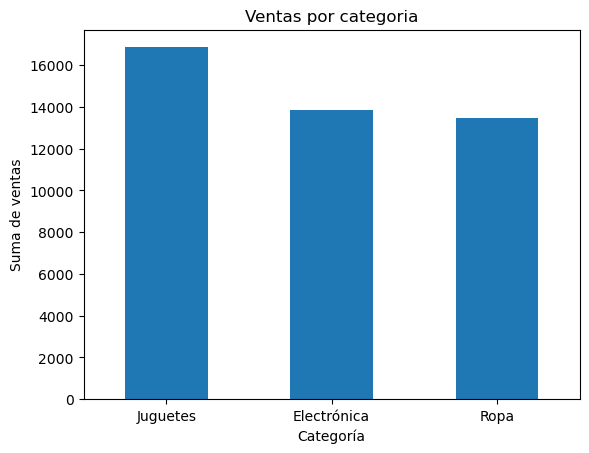

In [65]:
# Gráfico de barras mostrando las categorías más vendidas.

Categorias_mayor_ventas.plot(kind="bar",ylabel="Suma de ventas")
plt.title("Ventas por categoria")
plt.xticks(rotation = 0);

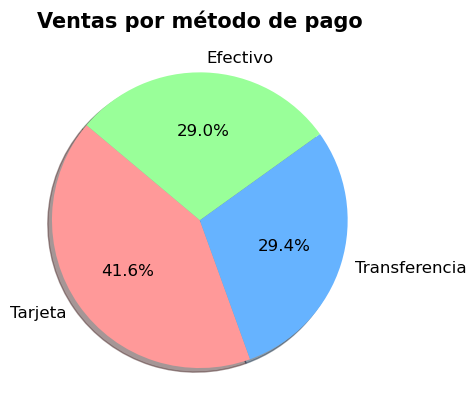

In [69]:
# GRÁFICO DE VENTAS POR MEDIO DE PAGO

colores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']   
plt.pie(x=ventas_metodo_de_pago,labels=df_ventas["Método de Pago"].unique(),autopct="%1.1f%%",colors=colores, shadow=True,
    startangle=140)
plt.setp(plt.gca().texts, fontsize=12, color='black') 
plt.title("Ventas por método de pago", fontsize=15, fontweight='bold', color='black');

## EJERCICIO CON DATOS SIMULADOS 2 (LIMPIEZA Y ANÁLISIS DE DATOS)

In [75]:
# Crear el dataframe desordenado con problemas planteados
data_desordenado = {
    'fecha_transaccion': ['2023/01/01', '01-02-2023', '3-Marzo-2023', '2023-04-05', '5/5/2023',
                          'Jun 7, 2023', np.nan, '10-10-2023', '15/11/2023', '2023/12/25'],
    'Producto': np.random.choice(['Producto A', 'Producto B', 'Producto C', 'Producto D'], 10),
    'categoría': ['Electrónica', 'ropa ', ' Juguetes', 'electronica', 'Hogar', 
                  'hogar', 'ELECTRONICA', 'juguetes', 'Ropa', 'Hogar '],
    'Precio_unitario': [150.5, -12.3, 2000.0, 99.99, 40.75, 50000.0, 25.0, 100.0, np.nan, 300.0],
    'cantidad_vendida': [2, 1, -3, 10, 0, 5, 1000, 6, np.nan, 7],
    'método_pago': ['Tarjteta', 'Efectivo', 'efctvo', np.nan, 'Tarjeta', 
                    'Transferencia', 'tarjeta', 'efectivo', 'Efectivo', 'efctvo']
}

df_desordenado = pd.DataFrame(data_desordenado)
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023/01/01,Producto C,Electrónica,150.50,2.0,Tarjteta
1,01-02-2023,Producto D,ropa,-12.30,1.0,Efectivo
2,3-Marzo-2023,Producto A,Juguetes,2000.00,-3.0,efctvo
3,2023-04-05,Producto D,electronica,99.99,10.0,NaN
4,5/5/2023,Producto D,Hogar,40.75,0.0,Tarjeta
5,"Jun 7, 2023",Producto D,hogar,50000.00,5.0,Transferencia
6,NaN,Producto D,ELECTRONICA,25.00,1000.0,tarjeta
7,10-10-2023,Producto B,juguetes,100.00,6.0,efectivo
8,15/11/2023,Producto C,Ropa,NaN,NaN,Efectivo
9,2023/12/25,Producto D,Hogar,300.00,7.0,efctvo


In [77]:
# CAMBIAR FORMATO DE FECHA E IMPUTAR NULOS

df_desordenado["fecha_transaccion"] = pd.to_datetime(df_desordenado["fecha_transaccion"], format = "mixed", errors ="coerce")
df_desordenado['fecha_transaccion'] = df_desordenado['fecha_transaccion'].fillna(pd.Timestamp('2023-03-03'))
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electrónica,150.50,2.0,Tarjteta
1,2023-01-02,Producto D,ropa,-12.30,1.0,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,-3.0,efctvo
3,2023-04-05,Producto D,electronica,99.99,10.0,NaN
4,2023-05-05,Producto D,Hogar,40.75,0.0,Tarjeta
5,2023-06-07,Producto D,hogar,50000.00,5.0,Transferencia
6,2023-03-03,Producto D,ELECTRONICA,25.00,1000.0,tarjeta
7,2023-10-10,Producto B,juguetes,100.00,6.0,efectivo
8,2023-11-15,Producto C,Ropa,NaN,NaN,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7.0,efctvo


In [79]:
# NORMALIZAR CATEGORIA 

df_desordenado["categoría"] = df_desordenado["categoría"].str.title() 
df_desordenado["categoría"] = df_desordenado["categoría"].str.normalize("NFKD").str.encode("ascii",errors="ignore").str.decode("utf-8")
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electronica,150.50,2.0,Tarjteta
1,2023-01-02,Producto D,Ropa,-12.30,1.0,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,-3.0,efctvo
3,2023-04-05,Producto D,Electronica,99.99,10.0,NaN
4,2023-05-05,Producto D,Hogar,40.75,0.0,Tarjeta
5,2023-06-07,Producto D,Hogar,50000.00,5.0,Transferencia
6,2023-03-03,Producto D,Electronica,25.00,1000.0,tarjeta
7,2023-10-10,Producto B,Juguetes,100.00,6.0,efectivo
8,2023-11-15,Producto C,Ropa,NaN,NaN,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7.0,efctvo


In [81]:
# IMPUTAR Y REEMPLZAR ERRORES EN METODO DE PAGO

df_desordenado["método_pago"] = df_desordenado["método_pago"].fillna("Desconocido")
df_desordenado["método_pago"] = df_desordenado["método_pago"].replace("Tarjteta","Tarjeta")
df_desordenado["método_pago"] = df_desordenado["método_pago"].str.title()
df_desordenado["método_pago"] = df_desordenado["método_pago"].replace("Efctvo","Efectivo")
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electronica,150.50,2.0,Tarjeta
1,2023-01-02,Producto D,Ropa,-12.30,1.0,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,-3.0,Efectivo
3,2023-04-05,Producto D,Electronica,99.99,10.0,Desconocido
4,2023-05-05,Producto D,Hogar,40.75,0.0,Tarjeta
5,2023-06-07,Producto D,Hogar,50000.00,5.0,Transferencia
6,2023-03-03,Producto D,Electronica,25.00,1000.0,Tarjeta
7,2023-10-10,Producto B,Juguetes,100.00,6.0,Efectivo
8,2023-11-15,Producto C,Ropa,NaN,NaN,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7.0,Efectivo


In [85]:
# ESTANDARIZAR COLUMNAS NÚMERICAS Y DEVOLVER VALOR ABSOLUTO 

df_desordenado["Precio_unitario"] = df_desordenado["Precio_unitario"].abs()
df_desordenado["cantidad_vendida"] = df_desordenado["cantidad_vendida"].abs()
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electronica,150.50,2.0,Tarjeta
1,2023-01-02,Producto D,Ropa,12.30,1.0,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,3.0,Efectivo
3,2023-04-05,Producto D,Electronica,99.99,10.0,Desconocido
4,2023-05-05,Producto D,Hogar,40.75,0.0,Tarjeta
5,2023-06-07,Producto D,Hogar,50000.00,5.0,Transferencia
6,2023-03-03,Producto D,Electronica,25.00,1000.0,Tarjeta
7,2023-10-10,Producto B,Juguetes,100.00,6.0,Efectivo
8,2023-11-15,Producto C,Ropa,NaN,NaN,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7.0,Efectivo


In [87]:
# IMPUTADR COLUMNAS NÚMERICAS

df_desordenado["Precio_unitario"] = df_desordenado["Precio_unitario"].fillna(df_desordenado["Precio_unitario"].mean()).round(2)
df_desordenado["cantidad_vendida"] = df_desordenado["cantidad_vendida"].fillna(df_desordenado["cantidad_vendida"].mean()).round(2).astype(int)
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electronica,150.50,2,Tarjeta
1,2023-01-02,Producto D,Ropa,12.30,1,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,3,Efectivo
3,2023-04-05,Producto D,Electronica,99.99,10,Desconocido
4,2023-05-05,Producto D,Hogar,40.75,0,Tarjeta
5,2023-06-07,Producto D,Hogar,50000.00,5,Transferencia
6,2023-03-03,Producto D,Electronica,25.00,1000,Tarjeta
7,2023-10-10,Producto B,Juguetes,100.00,6,Efectivo
8,2023-11-15,Producto C,Ropa,5858.73,114,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7,Efectivo


In [94]:
# VER MEDIDAS DE TENDENCIA CENTRAL

df_desordenado.describe(include = "all")

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
count,10,10,10,10.000000,10.000000,10
unique,NaN,4,7,NaN,NaN,4
top,NaN,Producto D,Electronica,NaN,NaN,Efectivo
freq,NaN,6,3,NaN,NaN,5
mean,2023-05-26 14:24:00,NaN,NaN,5858.727000,114.800000,NaN
min,2023-01-01 00:00:00,NaN,NaN,12.300000,0.000000,NaN
25%,2023-03-03 00:00:00,NaN,NaN,55.560000,2.250000,NaN
50%,2023-04-20 00:00:00,NaN,NaN,125.250000,5.500000,NaN
75%,2023-09-08 18:00:00,NaN,NaN,1575.000000,9.250000,NaN
max,2023-12-25 00:00:00,NaN,NaN,50000.000000,1000.000000,NaN


In [96]:
# OUTLIERS DE PRECIO UNITARIO

Q1,Q3 = 55.56, 1575
IQR = Q3 - Q1
L_inferior = Q1 - 1.5 * IQR
L_superior = Q3 + 1.5 * IQR
L_superior, L_inferior

(3854.16, -2223.6)

In [98]:
# FILTRAR Y REEMPLAZAR VALORES ATÍPICOS

atiplicos_precio = df_desordenado[df_desordenado["Precio_unitario"] > L_superior]
df_desordenado["Precio_unitario"] = df_desordenado["Precio_unitario"].apply(lambda x: L_superior if (x > L_superior) else x)
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electronica,150.50,2,Tarjeta
1,2023-01-02,Producto D,Ropa,12.30,1,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,3,Efectivo
3,2023-04-05,Producto D,Electronica,99.99,10,Desconocido
4,2023-05-05,Producto D,Hogar,40.75,0,Tarjeta
5,2023-06-07,Producto D,Hogar,3854.16,5,Transferencia
6,2023-03-03,Producto D,Electronica,25.00,1000,Tarjeta
7,2023-10-10,Producto B,Juguetes,100.00,6,Efectivo
8,2023-11-15,Producto C,Ropa,3854.16,114,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7,Efectivo


In [100]:
# OUTLIERS DE CANTIDAD

Q1,Q3 = 2.25, 9.25
IQR = Q3 - Q1
L_inferior = Q1 - 1.5 * IQR
L_superior = Q3 + 1.5 * IQR
L_superior, L_inferior

(19.75, -8.25)

In [104]:
# FILTRAR Y REEMPLAZAR VALORES ATÍPICOS 

atiplicos_precio = df_desordenado[df_desordenado["cantidad_vendida"] > L_superior]
df_desordenado["cantidad_vendida"] = df_desordenado["cantidad_vendida"].apply(lambda x: L_superior if (x > L_superior) else x).astype(int)
df_desordenado["categoría"] = df_desordenado["categoría"].str.strip()
df_desordenado

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto C,Electronica,150.50,2,Tarjeta
1,2023-01-02,Producto D,Ropa,12.30,1,Efectivo
2,2023-03-03,Producto A,Juguetes,2000.00,3,Efectivo
3,2023-04-05,Producto D,Electronica,99.99,10,Desconocido
4,2023-05-05,Producto D,Hogar,40.75,0,Tarjeta
5,2023-06-07,Producto D,Hogar,3854.16,5,Transferencia
6,2023-03-03,Producto D,Electronica,25.00,19,Tarjeta
7,2023-10-10,Producto B,Juguetes,100.00,6,Efectivo
8,2023-11-15,Producto C,Ropa,3854.16,19,Efectivo
9,2023-12-25,Producto D,Hogar,300.00,7,Efectivo


In [109]:
# 3 CATEGORIAS MÁS PRODUCTOS MÁS VENDIDAS

cat_mas_ven = df_desordenado.groupby("categoría")["cantidad_vendida"].sum()
cat_mas_ven.sort_values(ascending= False).head(3)

categoría
Electronica    31
Ropa           20
Hogar          12
Name: cantidad_vendida, dtype: int32

In [111]:
# METODO DE PAGO MAS UTILZIADO 

met_mas_usado = df_desordenado.groupby("método_pago")["método_pago"].count()
met_mas_usado.sort_values(ascending= False).head(1)

método_pago
Efectivo    5
Name: método_pago, dtype: int64

In [151]:
#  ¿Qué mes tuvo el mayor total de ventas?

mes_mas_ventas = df_desordenado.groupby(pd.Grouper(key="fecha_transaccion", freq="ME"))["cantidad_vendida"].sum()
mes_mas_ventas.sort_values(ascending= False).head(1)

fecha_transaccion
2023-03-31    22
Name: cantidad_vendida, dtype: int32

## EJERCICIO 3 DE A ANÁLISIS Y LIMPIEZA DE DATOS

In [114]:
ruta = "C:/Users/Julian/Downloads/dataset_desafio_julian.csv"

In [116]:
df = pd.read_csv(ruta)
df

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto A,Electrónica,546.24,2,Efectivo
1,2023-01-08,Producto C,Electrónica,1123.49,12,Desconocido
2,2023-01-15,Producto B,Hogar,3632.55,6,Tarjeta
3,2023-01-22,Producto C,Electrónica,3074.78,15,Desconocido
4,2023-01-29,Producto A,Electrónica,112.72,3,Tarjeta
...,...,...,...,...,...,...
95,2024-10-27,Producto B,Juguetes,607.20,9,Transferencia
96,2024-11-03,Producto B,Electrónica,2376.23,7,Transferencia
97,2024-11-10,Producto C,Electrónica,2531.18,16,Tarjeta
98,2024-11-17,Producto A,Juguetes,1322.74,13,Desconocido


In [118]:
# VALIDAR DATOS NULOS

df.isna().sum().sort_values(ascending = False)

fecha_transaccion    0
Producto             0
categoría            0
Precio_unitario      0
cantidad_vendida     0
método_pago          0
dtype: int64

In [120]:
# INFORMACIÓN DE LA TABLA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha_transaccion  100 non-null    object 
 1   Producto           100 non-null    object 
 2   categoría          100 non-null    object 
 3   Precio_unitario    100 non-null    float64
 4   cantidad_vendida   100 non-null    int64  
 5   método_pago        100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [122]:
# ESTANDARIZAR FORMATO DE FECHA

df["fecha_transaccion"] = pd.to_datetime(df["fecha_transaccion"], format= "%Y-%m-%d")
df

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
0,2023-01-01,Producto A,Electrónica,546.24,2,Efectivo
1,2023-01-08,Producto C,Electrónica,1123.49,12,Desconocido
2,2023-01-15,Producto B,Hogar,3632.55,6,Tarjeta
3,2023-01-22,Producto C,Electrónica,3074.78,15,Desconocido
4,2023-01-29,Producto A,Electrónica,112.72,3,Tarjeta
...,...,...,...,...,...,...
95,2024-10-27,Producto B,Juguetes,607.20,9,Transferencia
96,2024-11-03,Producto B,Electrónica,2376.23,7,Transferencia
97,2024-11-10,Producto C,Electrónica,2531.18,16,Tarjeta
98,2024-11-17,Producto A,Juguetes,1322.74,13,Desconocido


In [124]:
# VALIDAR DUPLICADOS

df.duplicated().sum()

0

In [128]:
# MEDIDAS DE TENDENCIA CENTRAL 

df.describe(include = "all")

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago
count,100,100,100,100.000000,100.000000,100
unique,NaN,4,4,NaN,NaN,4
top,NaN,Producto A,Juguetes,NaN,NaN,Tarjeta
freq,NaN,29,33,NaN,NaN,29
mean,2023-12-13 12:00:00,NaN,NaN,2387.591700,10.110000,NaN
min,2023-01-01 00:00:00,NaN,NaN,24.230000,1.000000,NaN
25%,2023-06-23 06:00:00,NaN,NaN,1209.507500,5.750000,NaN
50%,2023-12-13 12:00:00,NaN,NaN,2321.420000,11.000000,NaN
75%,2024-06-03 18:00:00,NaN,NaN,3547.157500,14.000000,NaN
max,2024-11-24 00:00:00,NaN,NaN,4946.470000,19.000000,NaN


In [130]:
# VERIFICAR SI HAY OUTLIERS EN CANTIDAD

Q1 = 6	
Q3 = 14
IQR = Q3 - Q1
L_I = Q1 - 1.5 * IQR
L_S = Q3 + 1.5 * IQR
L_I, L_S
# NO HAY OUTLIERS 

(-6.0, 26.0)

In [132]:
# VERIFICAR SI HAY OUTLIERS EN PRECIO_UNITARIO

Q1 = 1209.507500		
Q3 = 3547.157500
IQR = Q3 - Q1
L_I = Q1 - 1.5 * IQR
L_S = Q3 + 1.5 * IQR
L_I, L_S
# NO HAY OUTLIERS 

(-2296.9674999999997, 7053.6325)

In [134]:
# AGREGAR COLUMNA DE TOTAL DE VENTAS

df["Total_venta"] = df["Precio_unitario"] * df["cantidad_vendida"]
df

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago,Total_venta
0,2023-01-01,Producto A,Electrónica,546.24,2,Efectivo,1092.48
1,2023-01-08,Producto C,Electrónica,1123.49,12,Desconocido,13481.88
2,2023-01-15,Producto B,Hogar,3632.55,6,Tarjeta,21795.30
3,2023-01-22,Producto C,Electrónica,3074.78,15,Desconocido,46121.70
4,2023-01-29,Producto A,Electrónica,112.72,3,Tarjeta,338.16
...,...,...,...,...,...,...,...
95,2024-10-27,Producto B,Juguetes,607.20,9,Transferencia,5464.80
96,2024-11-03,Producto B,Electrónica,2376.23,7,Transferencia,16633.61
97,2024-11-10,Producto C,Electrónica,2531.18,16,Tarjeta,40498.88
98,2024-11-17,Producto A,Juguetes,1322.74,13,Desconocido,17195.62


In [138]:
#$ EXTRAER MES Y AÑO 

df["Mes"] = df["fecha_transaccion"].dt.month
df["Año"] = df["fecha_transaccion"].dt.year
df

,fecha_transaccion,Producto,categoría,Precio_unitario,cantidad_vendida,método_pago,Total_venta,Mes,Año
0,2023-01-01,Producto A,Electrónica,546.24,2,Efectivo,1092.48,1,2023
1,2023-01-08,Producto C,Electrónica,1123.49,12,Desconocido,13481.88,1,2023
2,2023-01-15,Producto B,Hogar,3632.55,6,Tarjeta,21795.30,1,2023
3,2023-01-22,Producto C,Electrónica,3074.78,15,Desconocido,46121.70,1,2023
4,2023-01-29,Producto A,Electrónica,112.72,3,Tarjeta,338.16,1,2023
...,...,...,...,...,...,...,...,...,...
95,2024-10-27,Producto B,Juguetes,607.20,9,Transferencia,5464.80,10,2024
96,2024-11-03,Producto B,Electrónica,2376.23,7,Transferencia,16633.61,11,2024
97,2024-11-10,Producto C,Electrónica,2531.18,16,Tarjeta,40498.88,11,2024
98,2024-11-17,Producto A,Juguetes,1322.74,13,Desconocido,17195.62,11,2024


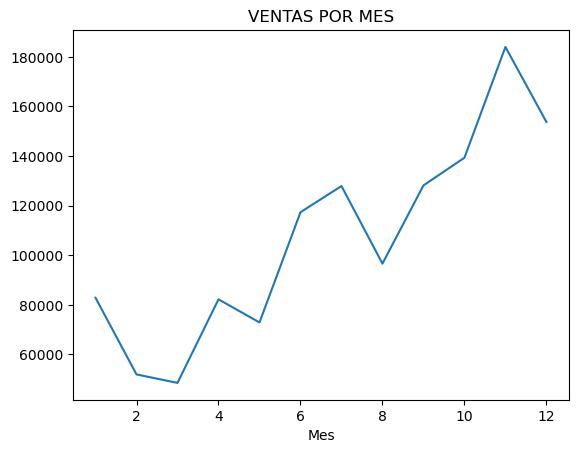

In [146]:
# EVOLUCIÓN DE VENTAS POR MES AÑO 2023 

Ventas_mes_2023 = df[df["Año"]==2023].groupby("Mes")["Total_venta"].sum()
Ventas_mes_2023.plot()
plt.title("VENTAS POR MES AÑO 2023");

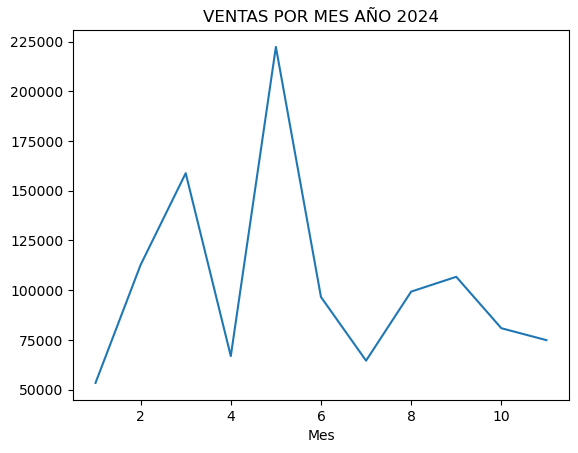

In [150]:
# EVOLUCIÓN VENTAS POR MES AÑO 2024 

Ventas_mes_2024 = df[df["Año"]==2024].groupby("Mes")["Total_venta"].sum()
Ventas_mes_2024.plot()
plt.title("VENTAS POR MES AÑO 2024");

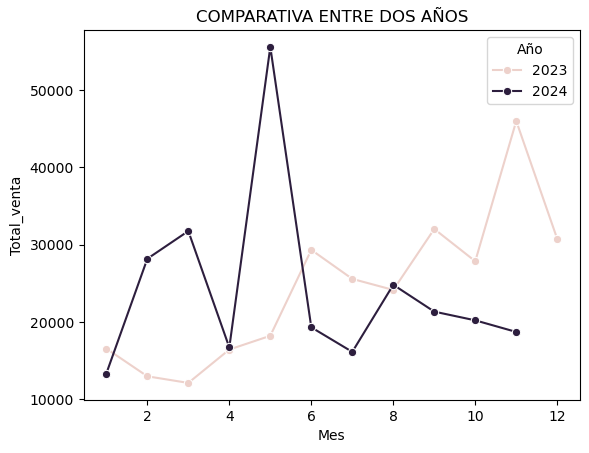

In [158]:
# COMPARATIVA ENTRE 2024 Y 2023 

sns.lineplot(data=df, x='Mes', y='Total_venta', hue='Año', marker='o',errorbar=None)
plt.title("COMPARATIVA ENTRE DOS AÑOS");

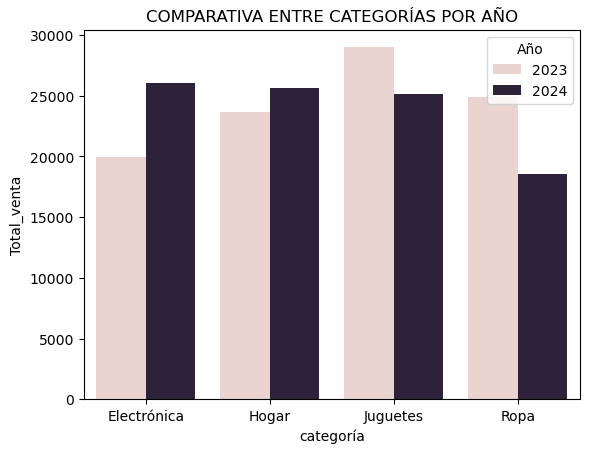

In [160]:
# COMPARATIVA ENTRE CATEGORÍAS POR AÑO 

sns.barplot(data=df, x='categoría', y='Total_venta',hue="Año",errorbar=None)
plt.title("COMPARATIVA ENTRE CATEGORÍAS POR AÑO");

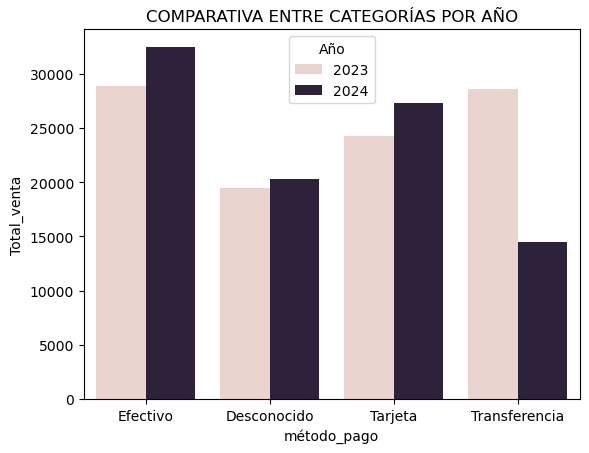

In [162]:
# COMPARATIVA ENTRE MEDIOS DE PAGO POR AÑO 

sns.barplot(data=df, x='método_pago', y='Total_venta',hue="Año",errorbar=None)
plt.title("COMPARATIVA ENTRE CATEGORÍAS POR AÑO");

In [164]:
# MODA POR MEDIO DE PAGO

moda_medio_de_pago =df.groupby(["Año","método_pago"])["método_pago"].count()
moda_medio_de_pago

Año   método_pago  
2023  Desconocido      17
      Efectivo         10
      Tarjeta          18
      Transferencia     8
2024  Desconocido      11
      Efectivo         14
      Tarjeta          11
      Transferencia    11
Name: método_pago, dtype: int64

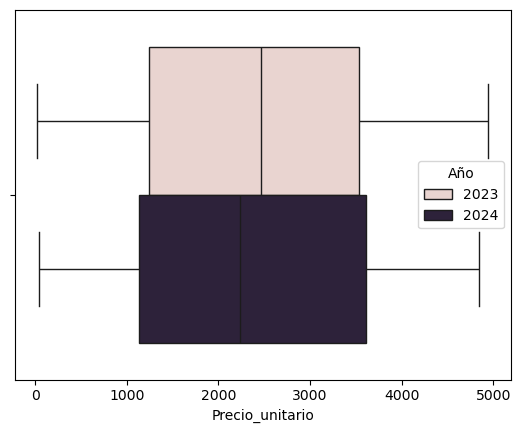

In [182]:
# DISTRIBUCIÓN PRECIO UNITARIO

sns.boxplot(data=df, x='Precio_unitario',hue="Año");

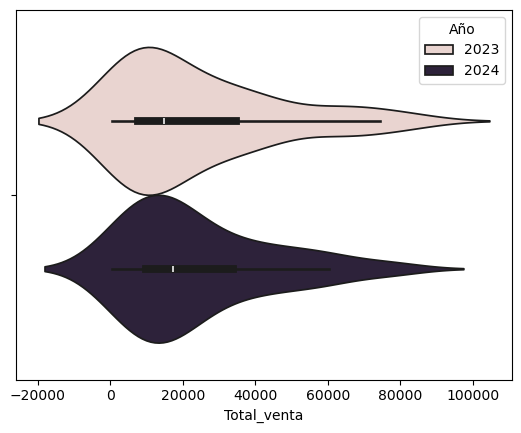

In [186]:
# DISTRIBUCIÓN CANTIDAD VENDIDA

sns.violinplot(data=df, x='Total_venta',hue="Año");